In [3]:
import torch
import sys
from matplotlib import gridspec
from matplotlib import pyplot as plt
sys.path.append('src')
from score_util_pub import *
from inference import *
import json
import os

----

## For SDXL-Lightning

In [ ]:
model = Generator('sdxl-light-1')

In [5]:
amplification_factor = [1.0]*7

# You can manually select amplification factor for each block 

amplification_factor[0] = 1.1 # amp factor for down 0 block
amplification_factor[1] = 1.3 # amp factor for down 1 block
amplification_factor[2] = 1.6 # amp factor for down 2 block
amplification_factor[3] = 1.8 # amp factor for middle block

# Or you can use the automatically found params
# Please note that the automatically found params are searched for each block 
# and needs to be further scaled to be used in combination.

# file_path = f'./results/sdxl-light-1/house/amp_factors_80.json'
file_path = f'./results/amp_factors_80.json'
with open(file_path, 'r') as file:
    data = json.load(file)
amplification_factor[0] = 1+(data[0][0]-1)*0.2
amplification_factor[1] = 1+(data[0][1]-1)*0.2
amplification_factor[2] = 1+(data[0][2]-1)*0.1
amplification_factor[3] = 1+(data[0][3]-1)*0.1


### house

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
run fft on mid


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
run fft on mid


100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

run gabor on up
run gabor on up
run gabor on up



  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply saliencyon down blocks
apply saliencyon down blocks
apply saliencyon down blocks
run fft on mid


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply saliencyon down blocks
apply saliencyon down blocks
apply saliencyon down blocks
run fft on mid


100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

run gabor on up
run gabor on up
run gabor on up


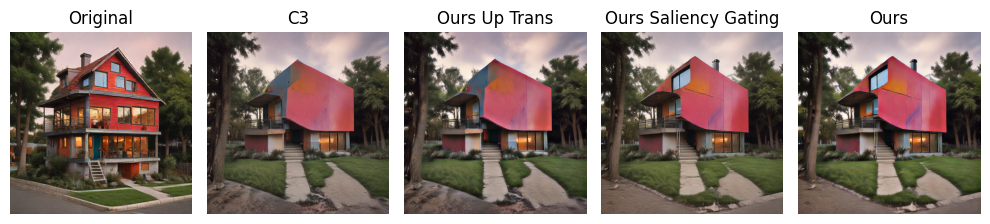

In [6]:
seed = 2
prompt = 'a creative house'
orig = model.orig(prompt=prompt, seed=seed)
c3 = model.c3(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0])
## only apply up blocks transformation
up_trans = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0], filter_factor=0.8, saliency_fft=False)
## only apply saliency gating
down_saliency = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0], apply_filter=False, filter_factor=0.8, saliency_fft=True)
dual = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor,cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0], filter_factor=0.8)

gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 1])
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
ax1.imshow(orig)
ax1.axis('off')
ax1.set_title('Original')

ax2.imshow(c3)
ax2.axis('off')
ax2.set_title('C3')

ax3.imshow(up_trans)
ax3.axis('off')
ax3.set_title('Ours Up Trans')

ax4.imshow(down_saliency)
ax4.axis('off')
ax4.set_title('Ours Saliency Gating')

ax5.imshow(dual)
ax5.axis('off')
ax5.set_title('Ours')
plt.tight_layout()

fig.savefig('house_result.svg', format='svg', bbox_inches='tight')

plt.show()

### building

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
run fft on mid


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
run fft on mid


100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

run gabor on up
run gabor on up
run gabor on up



  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply saliencyon down blocks
apply saliencyon down blocks
apply saliencyon down blocks
run fft on mid


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply saliencyon down blocks
apply saliencyon down blocks
apply saliencyon down blocks
run fft on mid


100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

run gabor on up
run gabor on up
run gabor on up


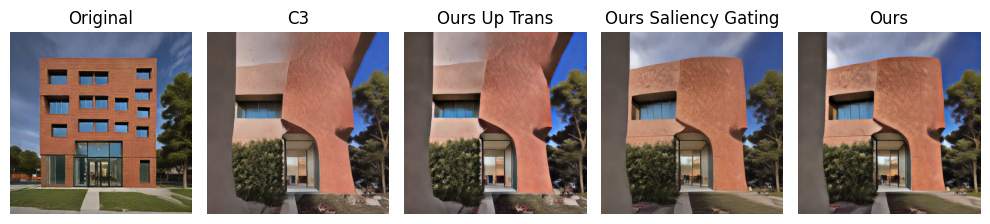

In [7]:
seed = 2
prompt = 'a creative building'
orig = model.orig(prompt=prompt, seed=seed)
c3 = model.c3(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0])
up_trans = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0], filter_factor=0.8, saliency_fft=False)
down_saliency = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0], apply_filter=False, filter_factor=0.8, saliency_fft=True)
dual = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor,cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0], filter_factor=0.8)

gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 1])
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
ax1.imshow(orig)
ax1.axis('off')
ax1.set_title('Original')

ax2.imshow(c3)
ax2.axis('off')
ax2.set_title('C3')

ax3.imshow(up_trans)
ax3.axis('off')
ax3.set_title('Ours Up Trans')

ax4.imshow(down_saliency)
ax4.axis('off')
ax4.set_title('Ours Saliency Gating')

ax5.imshow(dual)
ax5.axis('off')
ax5.set_title('Ours')
plt.tight_layout()

fig.savefig('building_result.svg', format='svg', bbox_inches='tight')
plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
run fft on mid


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
run fft on mid


100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

run gabor on up
run gabor on up
run gabor on up



  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply saliencyon down blocks
apply saliencyon down blocks
apply saliencyon down blocks
run fft on mid


  0%|          | 0/1 [00:00<?, ?it/s]

>>> ENTER UNET FORWARD
apply saliencyon down blocks
apply saliencyon down blocks
apply saliencyon down blocks
run fft on mid


100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

run gabor on up
run gabor on up
run gabor on up


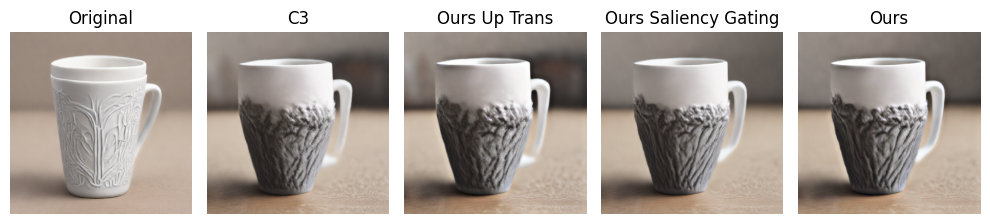

In [9]:
seed = 42
prompt = 'a creative cup'
orig = model.orig(prompt=prompt, seed=seed)

c3 = model.c3(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0])

up_trans = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0], filter_factor=0.8, saliency_fft=False)
down_saliency = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor, cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0], apply_filter=False, filter_factor=0.8, saliency_fft=True)
dual = model.dual_stage(prompt=prompt, seed=seed, replace_mask=amplification_factor,cutoff=[10.0,5.0,5.0,5.0,1.0,1.0,1.0], filter_factor=0.8)

gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 1])
fig = plt.figure(figsize=(10, 5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])
ax1.imshow(orig)
ax1.axis('off')
ax1.set_title('Original')

ax2.imshow(c3)
ax2.axis('off')
ax2.set_title('C3')

ax3.imshow(up_trans)
ax3.axis('off')
ax3.set_title('Ours Up Trans')

ax4.imshow(down_saliency)
ax4.axis('off')
ax4.set_title('Ours Saliency Gating')

ax5.imshow(dual)
ax5.axis('off')
ax5.set_title('Ours')
plt.tight_layout()

fig.savefig('cup_result.svg', format='svg', bbox_inches='tight')

plt.show()